# Abalone Case Study

Problem Statement:
    
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

In [1]:
# First we will import the required libraries
import pandas as pd
import numpy as np

In [3]:
#Now we will load the dataset using read_csv
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Our dataset has 4177 rows and 9 columns

In [4]:
#Now we will check with top rows
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
#Now we will check the null values in the dataset
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

We do not have any null values in our dataset

In [6]:
#Now we will check the datatype of our columns
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Data types are float, object and integer in the dataset

# Exploratory Data Analysis

In [10]:
df.shape

(4177, 9)

Dataset has 9 Columns and 4177 Rows

# Checking the columns of the dataset

In [11]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

# Checking the unique values in the target variable 'rings'

In [13]:
df['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

Displaying the unique values of the target variable

# Checking the number of unique values in the variable

In [14]:
df['Rings'].nunique()

28

# Exploring data variables

In [15]:
df.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

# Description of the dataset

In [16]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


As per above observations:
    
    1. Mean value of the variables is greater than the median value(50 %) in case of sex,whole weight,shucked weight,viscera weight,Rings.
    
    2. There is more difference in 75% and max value in case of height,whole weight,shucked weight,viscera weight,shell weight,Rings.
    
    3. The 1 and 2 obsevations suggest that there are extreme outliers present in these columns

# Making DataFrame for the Nominal Data

In [17]:
df_visualization_nominal=df[['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']].copy()

In [18]:
df_visualization_nominal.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

# Visualization of Dataset

For the nominal categorical data we will use countplot as it will give the frequency of the classes of the columns:

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization of Dataset using Countplot

2    1528
1    1342
0    1307
Name: Sex, dtype: int64


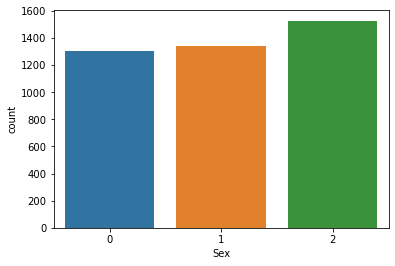

In [68]:
bx = sns.countplot(x="Sex",data=df_visualization_nominal)
print(df_visualization_nominal["Sex"].value_counts())

The above graph shows that sex variable is a classification factor so we have used countplot to get the frequency.

0.625    94
0.550    94
0.575    93
0.580    92
0.600    87
         ..
0.075     1
0.815     1
0.110     1
0.150     1
0.800     1
Name: Length, Length: 134, dtype: int64


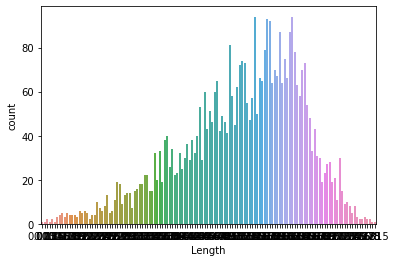

In [21]:
bx = sns.countplot(x="Length",data=df_visualization_nominal)
print(df_visualization_nominal["Length"].value_counts())

0.450    139
0.475    120
0.400    111
0.500    110
0.470    100
        ... 
0.610      1
0.650      1
0.620      1
0.095      1
0.615      1
Name: Diameter, Length: 111, dtype: int64


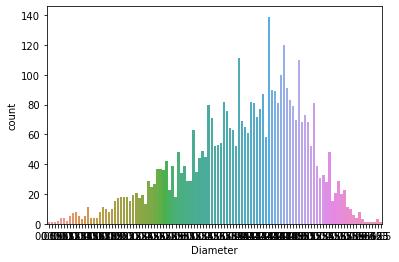

In [22]:
cx = sns.countplot(x="Diameter",data=df_visualization_nominal)
print(df_visualization_nominal["Diameter"].value_counts())

0.150    267
0.140    220
0.155    217
0.175    211
0.160    205
0.125    202
0.165    193
0.135    189
0.145    182
0.130    169
0.120    169
0.170    160
0.100    145
0.110    135
0.115    133
0.180    131
0.090    124
0.105    114
0.185    103
0.190    103
0.095     91
0.195     78
0.080     76
0.085     74
0.200     68
0.075     61
0.070     47
0.205     45
0.065     39
0.215     31
0.060     26
0.055     25
0.210     23
0.050     18
0.220     17
0.040     13
0.225     13
0.045     11
0.230     10
0.030      6
0.035      6
0.235      6
0.025      5
0.240      4
0.250      3
0.020      2
0.015      2
0.000      2
0.010      1
0.515      1
1.130      1
Name: Height, dtype: int64


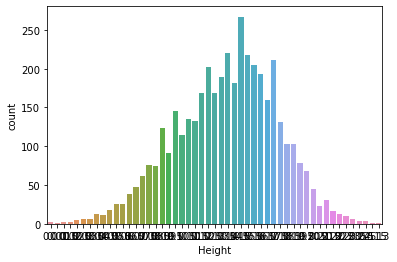

In [23]:
dx = sns.countplot(x="Height",data=df_visualization_nominal)
print(df_visualization_nominal["Height"].value_counts())

0.2225    8
1.1345    7
0.9700    7
0.4775    7
0.1960    7
         ..
0.0475    1
1.8930    1
1.8725    1
2.1055    1
1.9485    1
Name: Whole weight, Length: 2429, dtype: int64


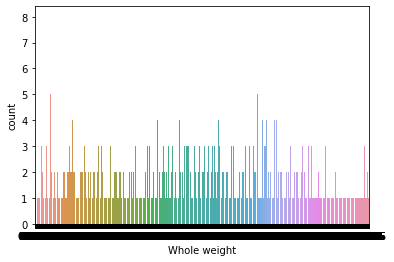

In [24]:
ex = sns.countplot(x="Whole weight",data=df_visualization_nominal)
print(df_visualization_nominal["Whole weight"].value_counts())

0.1750    11
0.2505    10
0.0970     9
0.0960     9
0.4190     9
          ..
0.4175     1
0.1935     1
0.1790     1
0.1275     1
0.9455     1
Name: Shucked weight, Length: 1515, dtype: int64


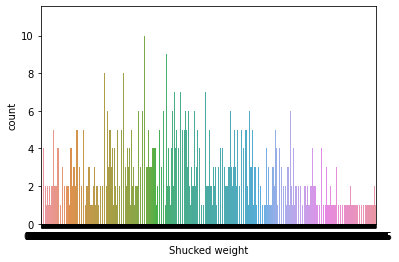

In [26]:
fx = sns.countplot(x="Shucked weight",data=df_visualization_nominal)
print(df_visualization_nominal["Shucked weight"].value_counts())

0.1715    15
0.1960    14
0.0575    13
0.0610    13
0.0370    13
          ..
0.4270     1
0.4075     1
0.4920     1
0.4650     1
0.5260     1
Name: Viscera weight, Length: 880, dtype: int64


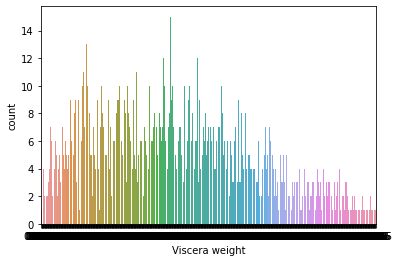

In [27]:
gx = sns.countplot(x="Viscera weight",data=df_visualization_nominal)
print(df_visualization_nominal["Viscera weight"].value_counts())

0.2750    43
0.2500    42
0.2650    40
0.3150    40
0.1850    40
          ..
0.0060     1
0.6460     1
0.5010     1
0.3295     1
0.0920     1
Name: Shell weight, Length: 926, dtype: int64


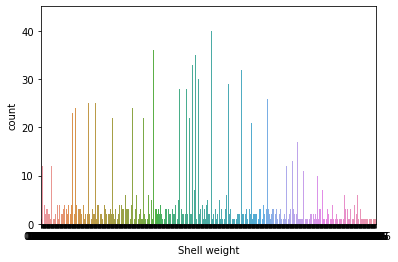

In [28]:
hx = sns.countplot(x="Shell weight",data=df_visualization_nominal)
print(df_visualization_nominal["Shell weight"].value_counts())

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64


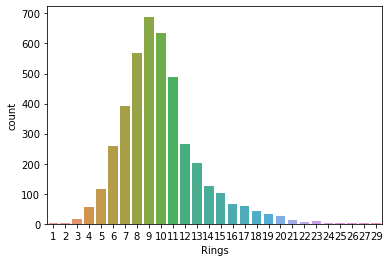

In [29]:
ix = sns.countplot(x="Rings",data=df_visualization_nominal)
print(df_visualization_nominal["Rings"].value_counts())

# Visualization of Dataset using Histogram

<AxesSubplot:xlabel='Sex', ylabel='Count'>

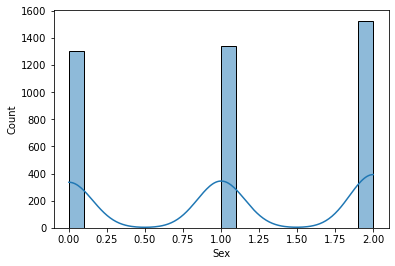

In [30]:
sns.histplot(x='Sex',data=df,bins=20,kde=True)

The above graph shows histogram representation of sex variable

<AxesSubplot:xlabel='Length', ylabel='Count'>

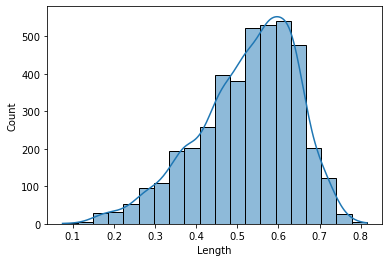

In [31]:
sns.histplot(x='Length',data=df,bins=20,kde=True)

The above graph shows histogram representation of length variable

<AxesSubplot:xlabel='Diameter', ylabel='Count'>

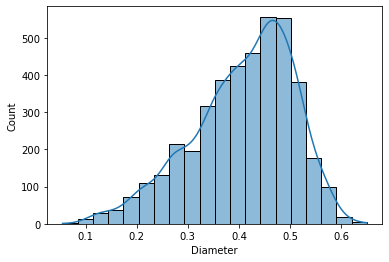

In [32]:
sns.histplot(x='Diameter',data=df,bins=20,kde=True)

The above graph shows histogram representation of diameter variable

<AxesSubplot:xlabel='Height', ylabel='Count'>

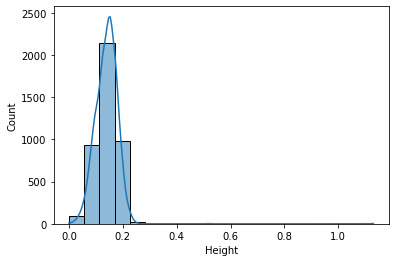

In [33]:
sns.histplot(x='Height',data=df,bins=20,kde=True)

The above graph shows histogram representation of height variable

<AxesSubplot:xlabel='Whole weight', ylabel='Count'>

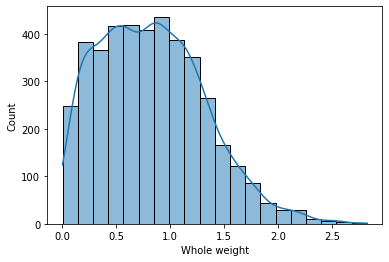

In [34]:
sns.histplot(x='Whole weight',data=df,bins=20,kde=True)

The above graph shows histogram representation of whole weight variable

<AxesSubplot:xlabel='Shucked weight', ylabel='Count'>

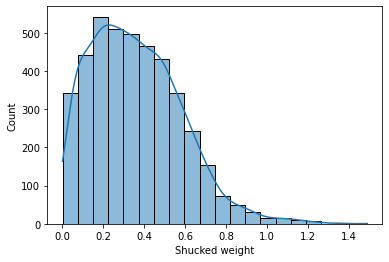

In [35]:
sns.histplot(x='Shucked weight',data=df,bins=20,kde=True)

The above graph shows histogram representation of shucked weight variable

<AxesSubplot:xlabel='Viscera weight', ylabel='Count'>

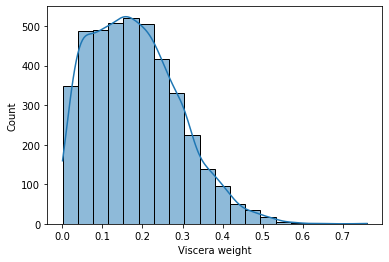

In [36]:
sns.histplot(x='Viscera weight',data=df,bins=20,kde=True)

The above graph shows histogram representation of viscera weight variable

<AxesSubplot:xlabel='Shell weight', ylabel='Count'>

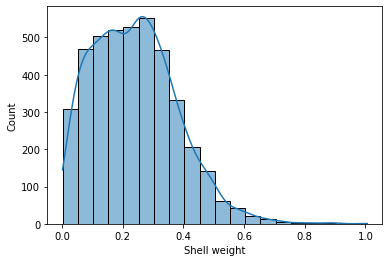

In [37]:
sns.histplot(x='Shell weight',data=df,bins=20,kde=True)

The above graph shows histogram representation of shell weight variable 

<AxesSubplot:xlabel='Rings', ylabel='Count'>

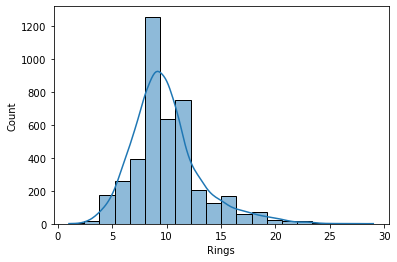

In [38]:
sns.histplot(x='Rings',data=df,bins=20,kde=True)

The above graph shows histogram representation of Rings target variable

# Visualization of Dataset using Violin Plot

<AxesSubplot:xlabel='Sex'>

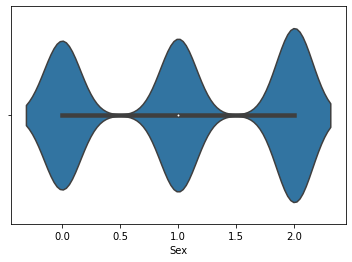

In [41]:
sns.violinplot(x='Sex', data=df)

<AxesSubplot:xlabel='Length'>

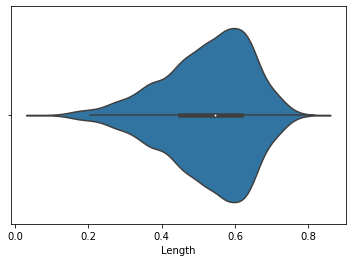

In [42]:
sns.violinplot(x='Length', data=df)

As per above violin plot, extreme outliers are present at 0.5 to 0.6

<AxesSubplot:xlabel='Diameter'>

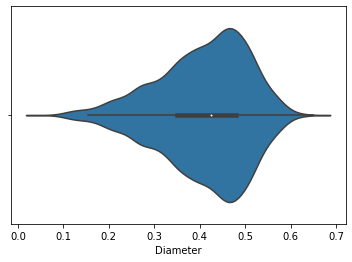

In [44]:
sns.violinplot(x='Diameter', data=df)

As per above violin plot, extreme outliers are present at 0.45

<AxesSubplot:xlabel='Height'>

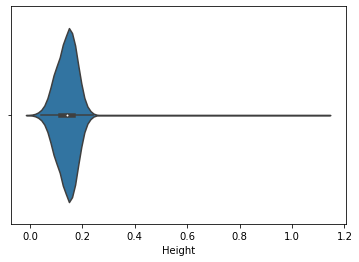

In [45]:
sns.violinplot(x='Height', data=df)

As per above violin plot, extreme outliers are present at 0.15

<AxesSubplot:xlabel='Whole weight'>

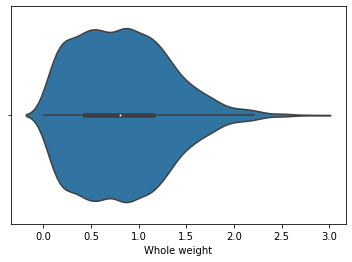

In [46]:
sns.violinplot(x='Whole weight', data=df)

As per above violin plot, extreme outliers are present at 0.5 to 1.0

<AxesSubplot:xlabel='Shucked weight'>

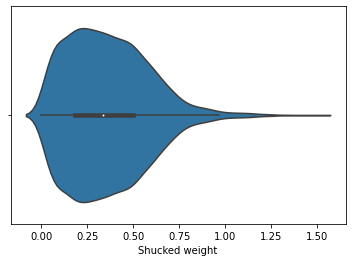

In [47]:
sns.violinplot(x='Shucked weight', data=df)

As per above violin plot, extreme outliers are present at 0.25

<AxesSubplot:xlabel='Viscera weight'>

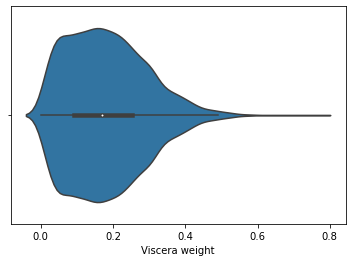

In [48]:
sns.violinplot(x='Viscera weight', data=df)

As per above violin plot, extreme outliers are present at 0.1 to 0.18

<AxesSubplot:xlabel='Shell weight'>

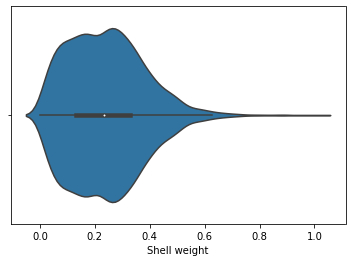

In [49]:
sns.violinplot(x='Shell weight', data=df)

As per above violin plot, extreme outliers are present at 0.2 to 0.25

<AxesSubplot:xlabel='Rings'>

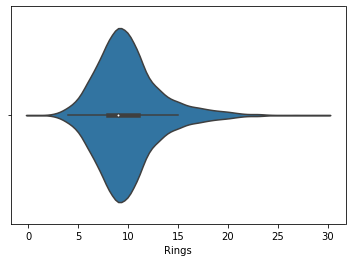

In [50]:
sns.violinplot(x='Rings', data=df)

As per above violin plot, extreme outliers are present at 9.0

# Visualization of Dataset using Box Plot

<AxesSubplot:>

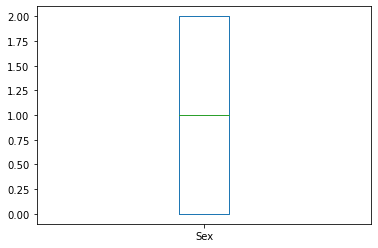

In [52]:
df['Sex'].plot.box()

The above graph shows that there are no outliers in sex variable.

<AxesSubplot:>

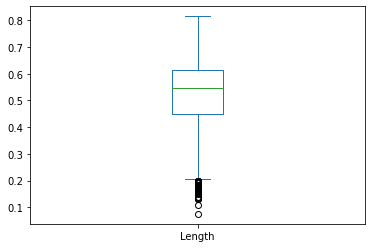

In [53]:
df['Length'].plot.box()

The above graph shows that there are more outliers present in 0.1 to 0.2 region in our independent variable length.

<AxesSubplot:>

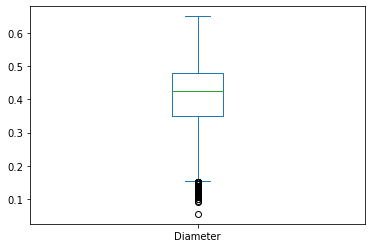

In [54]:
df['Diameter'].plot.box()

The above graph shows that there are extreme outliers present in 0.09 to 0.18 region in our independent variable diameter.

<AxesSubplot:>

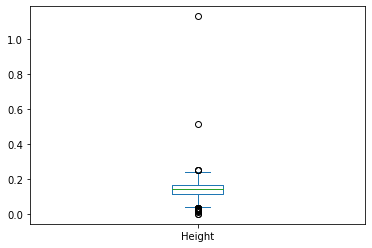

In [55]:
df['Height'].plot.box()

The above graph shows that there are extreme outliers present in 0.00 to 0.1 region & few outliers in 0.25,0.5,1.2 regions in our independent variable height

<AxesSubplot:>

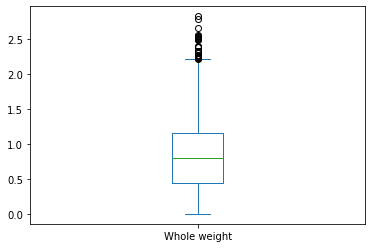

In [56]:
df['Whole weight'].plot.box()

The above graph shows that there are extreme outliers present in 2.2 to 2.6 region in our independent variable whole weight.

<AxesSubplot:>

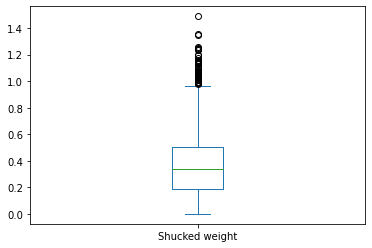

In [57]:
df['Shucked weight'].plot.box()

The above graph shows that there are extreme outliers present in 1.0 to 1.4 region in our independent variable shucked weight.

<AxesSubplot:>

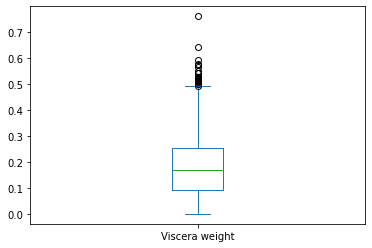

In [58]:
df['Viscera weight'].plot.box()

The above graph shows that there are extreme outliers present in 0.5 to 0.6 region in our independent variable viscera weight.

<AxesSubplot:>

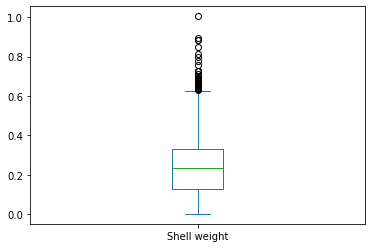

In [59]:
df['Shell weight'].plot.box()

The above graph shows that there are extreme outliers present in 0.62 to 1.0 region in our independent variable shell weight.

<AxesSubplot:>

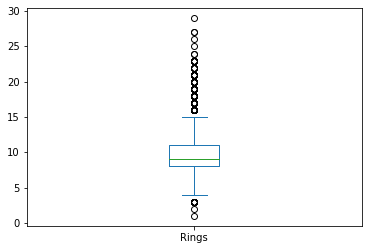

In [60]:
df['Rings'].plot.box()

The above graph shows that there are few outliers present in 0 to 4 region & extreme outliers in 16 to 29 range in our target variable Rings.

# Visualization of Dataset using Distribution plot

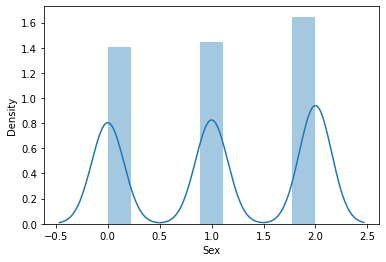

In [72]:
sns.distplot(df["Sex"])
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Length', ylabel='Density'>

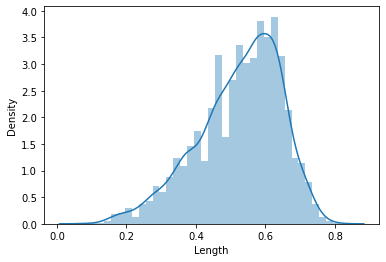

In [73]:
sns.distplot(df["Length"])

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

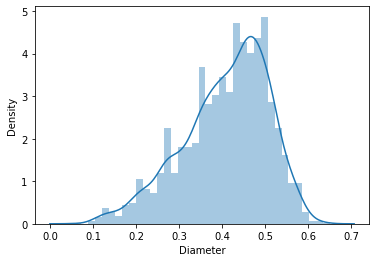

In [74]:
sns.distplot(df["Diameter"])

<AxesSubplot:xlabel='Height', ylabel='Density'>

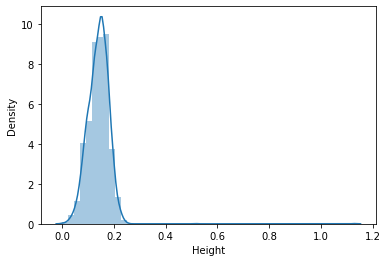

In [75]:
sns.distplot(df["Height"])

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

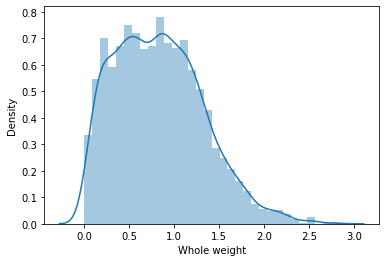

In [76]:
sns.distplot(df["Whole weight"])

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

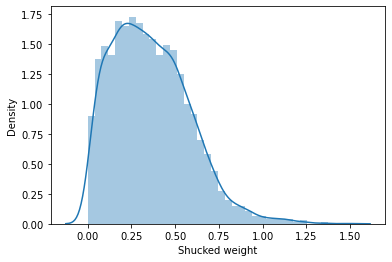

In [77]:
sns.distplot(df["Shucked weight"])

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

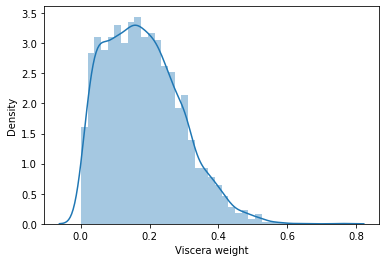

In [78]:
sns.distplot(df["Viscera weight"])

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

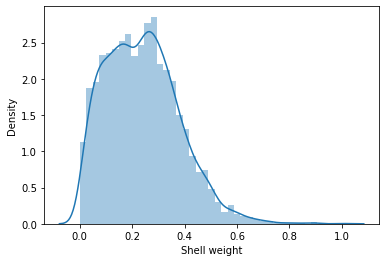

In [79]:
sns.distplot(df["Shell weight"])

<AxesSubplot:xlabel='Rings', ylabel='Density'>

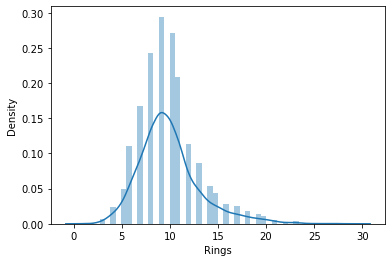

In [80]:
sns.distplot(df["Rings"])

# Visualization of Dataset using Scatter plot

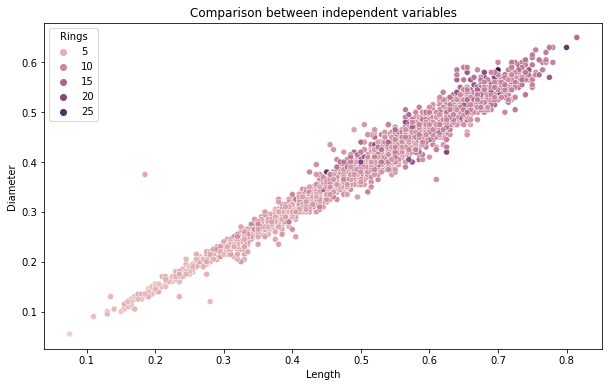

In [82]:
plt.figure(figsize=[10,6])
plt.title('Comparison between independent variables')
sns.scatterplot(df['Length'], df['Diameter'], hue=df["Rings"]);

The above figure shows the Comparison between independent variables Length and Diameter.

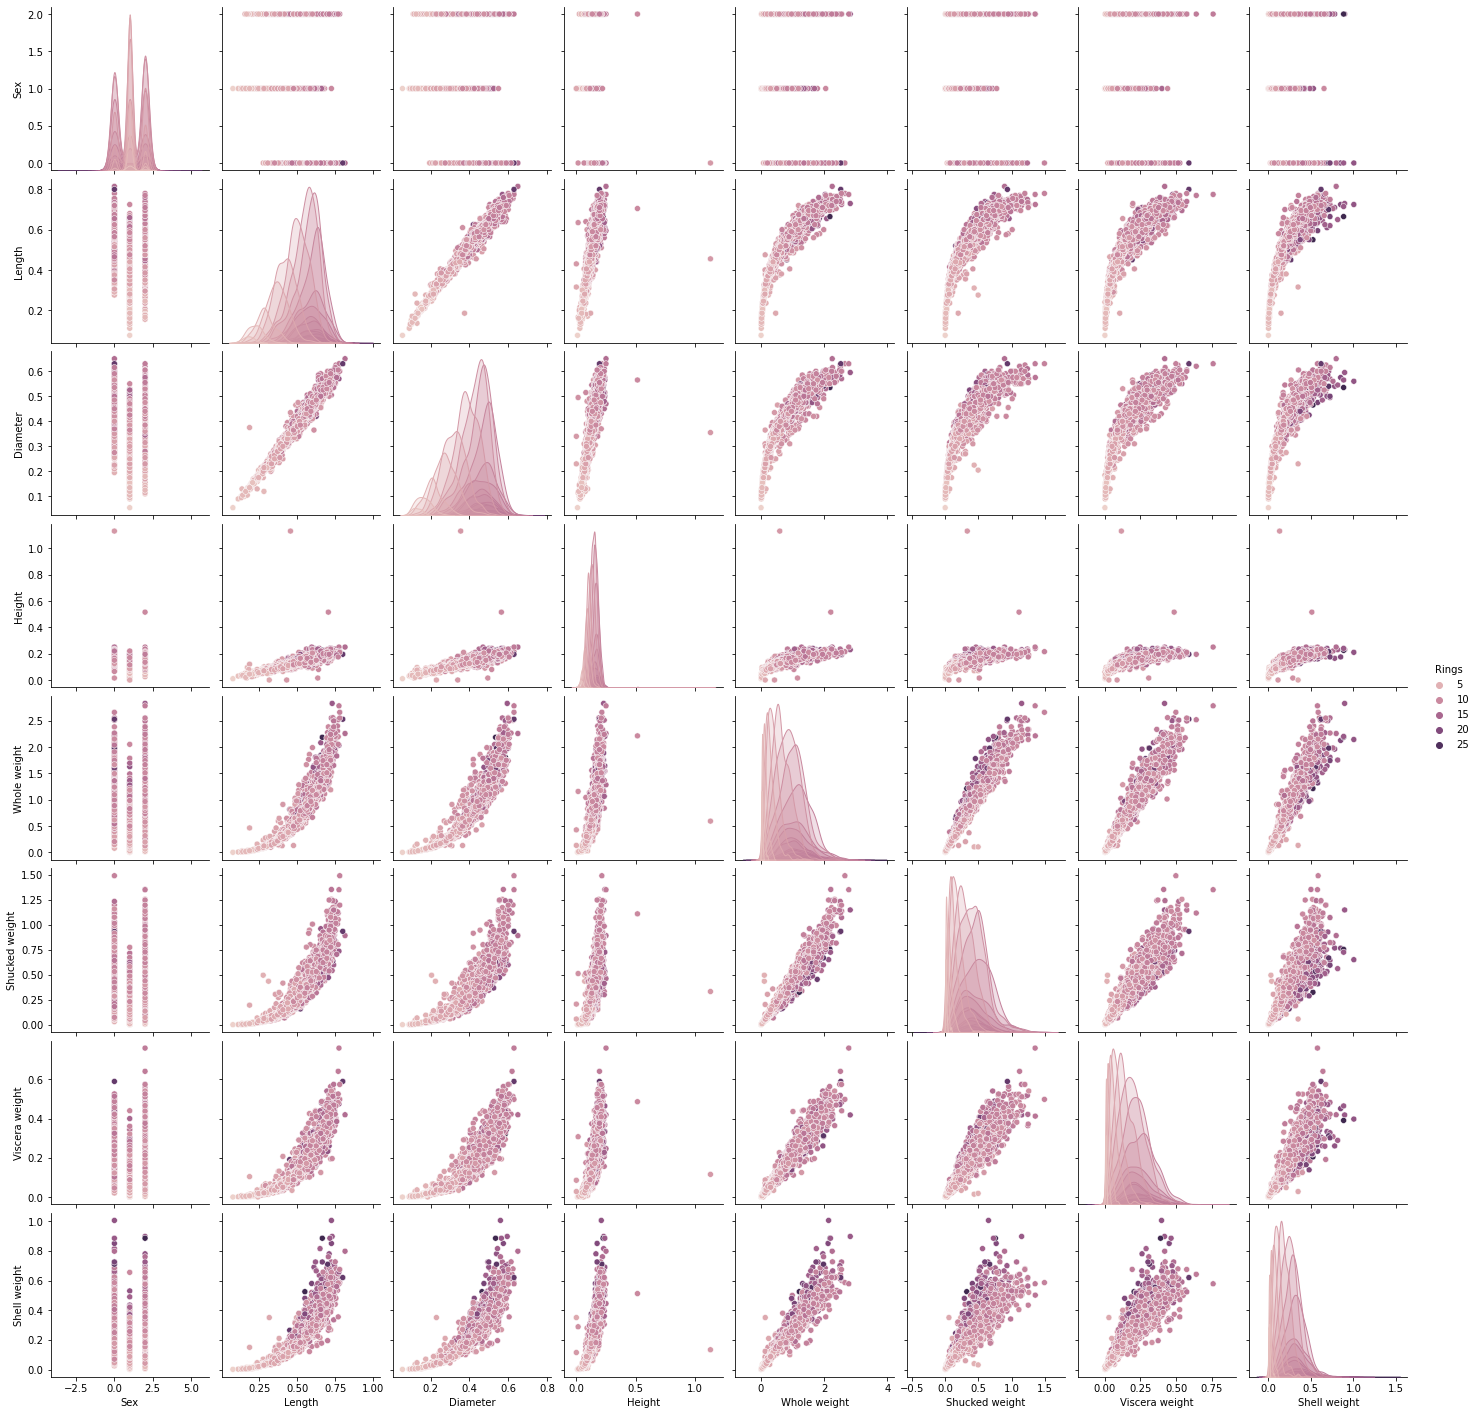

In [83]:
sns.pairplot(df,hue='Rings')

Plotted the pairplot for all the indipendent variables.

# Importing Matplotlib and analysing the data using heatmap

<AxesSubplot:>

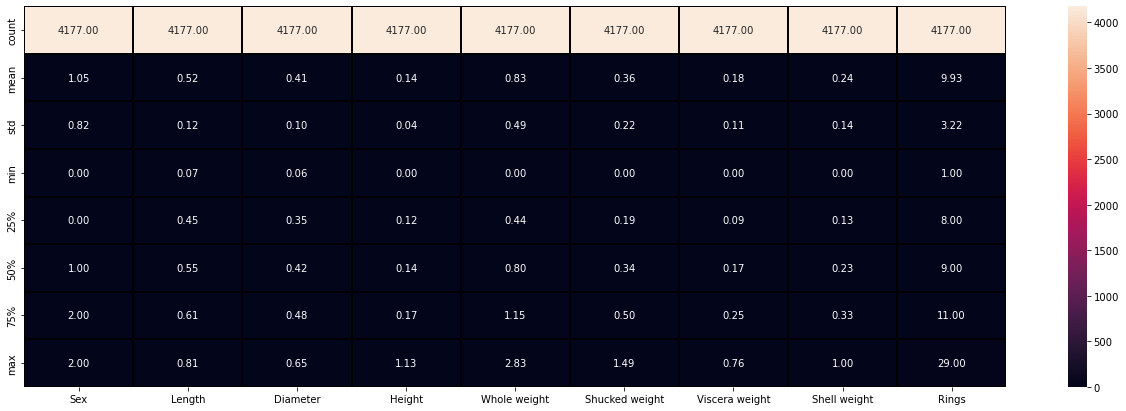

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(), linewidths=0.1, annot=True,linecolor="black", fmt="0.2f")

The above fig shows heatmap plotted using describe function.

# Checking the correlation :

In [64]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


1. Correlation of sex with respect to target variable rings is -0.034627 (negative)

2. Correlation of length with respect to target variable rings is 0.556720 (positive)

3. Correlation of diameter with respect to target variable rings is 0.574660 (positive)

4. Correlation of Height with respect to target variable rings is 0.557467 (positive)

5. Correlation of Whole weight with respect to target variable rings is 0.540390 (positive)

6. Correlation of Shucked weight with respect to target variable rings is 0.420884 (positive)

7. Correlation of Viscera weight with respect to target variable rings is 0.503819 (positive)

8. Correlation of Shell weight with respect to target variable rings is 0.627574 (positive)

9. Correlation of Rings with respect to target variable rings is 1.

Checked the co-relation between the variables.

<AxesSubplot:>

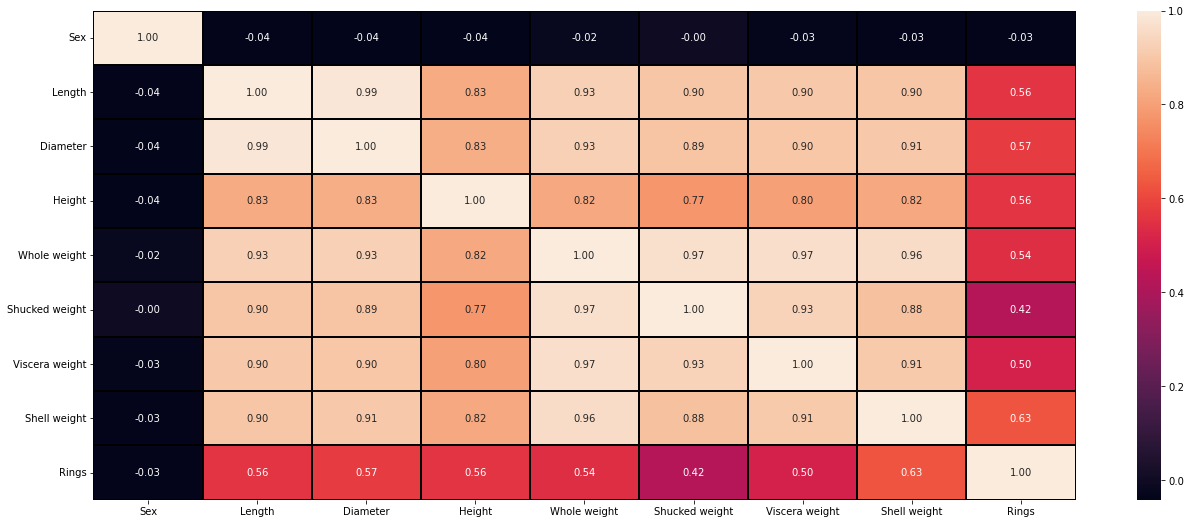

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,9))
sns.heatmap(df.corr(), linewidths=0.2, annot=True,linecolor="black", fmt="0.2f")

The above fig shows heatmap plotted using corr function.

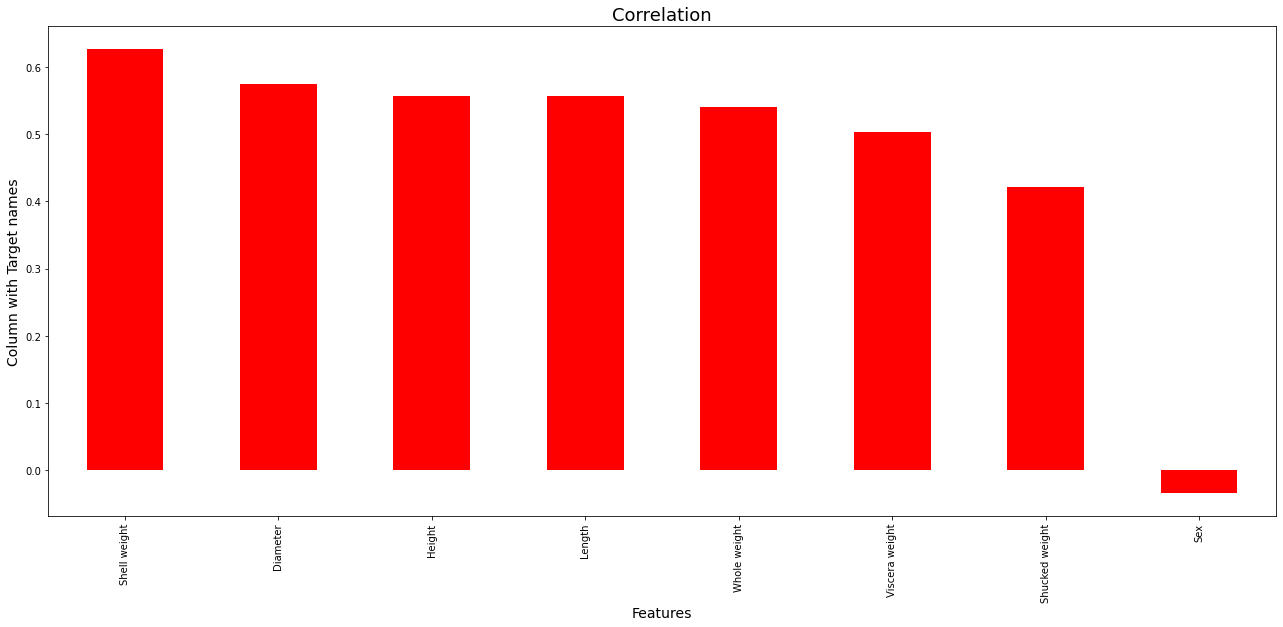

In [85]:
plt.figure(figsize=(22,9))
df.corr()['Rings'].sort_values(ascending=False).drop(['Rings']).plot(kind='bar',color='r')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column with Target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

The above figure shows the co-relation of the target variable with other independent variable.

# Removing Outliers using z-score Method

In [86]:
df.shape

(4177, 9)

In [87]:
#importing z-score
from scipy.stats import zscore

In [88]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
         166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
         238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
         334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
         433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
         674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
         754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
        1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
        1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
        1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
        1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
        2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
        2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
        2436, 2459, 2471, 2544, 2623, 

In [89]:
df_new=df[(z<3).all(axis=1)]
df_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [90]:
df_new.shape

(4027, 9)

After removing outliers, now we have 4027 rows and 9 columns.

In [91]:
# Lets check the data loss.
Data_loss = ((4177-4027)/4177)*100
Data_loss

3.5910940866650707

we have lost the data 3.5% of the dataset.

# Separating x and y

In [93]:
x=df_new.drop("Rings",axis=1)
y=df_new["Rings"]

# Checking Skewness

In [94]:
x.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
dtype: float64

We have skewness only in two variables.

# Transforming Dataset

In [95]:
from sklearn.preprocessing import power_transform

In [96]:
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.13432919, -0.68445079, -0.54337947, ..., -0.54086524,
        -0.68803217, -0.58635376],
       [ 1.13432919, -1.4117394 , -1.40113174, ..., -1.31131805,
        -1.33285416, -1.33271691],
       [-1.31306782, -0.0462191 ,  0.03716259, ..., -0.36270513,
        -0.24037305, -0.08021413],
       ...,
       [ 1.13432919,  0.65112915,  0.70592133, ...,  0.90189694,
         1.08965131,  0.66363183],
       [-1.31306782,  0.92606411,  0.8377131 , ...,  0.92415296,
         0.87642835,  0.57752029],
       [ 1.13432919,  1.9719402 ,  1.85550496, ...,  2.31446634,
         1.73214622,  1.85675543]])

# Scaling Dataset

In [98]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.13432919, -0.68445079, -0.54337947, ..., -0.54086524,
        -0.68803217, -0.58635376],
       [ 1.13432919, -1.4117394 , -1.40113174, ..., -1.31131805,
        -1.33285416, -1.33271691],
       [-1.31306782, -0.0462191 ,  0.03716259, ..., -0.36270513,
        -0.24037305, -0.08021413],
       ...,
       [ 1.13432919,  0.65112915,  0.70592133, ...,  0.90189694,
         1.08965131,  0.66363183],
       [-1.31306782,  0.92606411,  0.8377131 , ...,  0.92415296,
         0.87642835,  0.57752029],
       [ 1.13432919,  1.9719402 ,  1.85550496, ...,  2.31446634,
         1.73214622,  1.85675543]])

# Checking the best Random State

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.3184449958643507  on Random_state  50


# Model selection using linear regression method

In [99]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [100]:
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i}, the trainig accuracy is :- {r2_score(y_train,pred_train)}')
    print(f'At random state {i}, the testing accuracy is :- {r2_score(y_test,pred_test)}')
    print('/n')

At random state 0, the trainig accuracy is :- 0.5287343353901868
At random state 0, the testing accuracy is :- 0.4716769472502219
/n
At random state 1, the trainig accuracy is :- 0.5210252310792032
At random state 1, the testing accuracy is :- 0.48550523442671334
/n
At random state 2, the trainig accuracy is :- 0.5114913769686834
At random state 2, the testing accuracy is :- 0.5139120454121423
/n
At random state 3, the trainig accuracy is :- 0.5142830557903371
At random state 3, the testing accuracy is :- 0.505935677022787
/n
At random state 4, the trainig accuracy is :- 0.5118528564980562
At random state 4, the testing accuracy is :- 0.5113650293867068
/n
At random state 5, the trainig accuracy is :- 0.5230422132611261
At random state 5, the testing accuracy is :- 0.48559880487203233
/n
At random state 6, the trainig accuracy is :- 0.5139334967622464
At random state 6, the testing accuracy is :- 0.5075185240315374
/n
At random state 7, the trainig accuracy is :- 0.5246470090492932
At 

# Model selection using Decision tree regressor

In [101]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    dtr.fit(x_train,y_train)
    preddtr_train=dtr.predict(x_train)
    preddtr_test=dtr.predict(x_test)
    print(f'At random state {i}, the trainig accuracy is :- {r2_score(y_train,pred_train)}')
    print(f'At random state {i}, the testing accuracy is :- {r2_score(y_test,pred_test)}')
    print('/n')

At random state 0, the trainig accuracy is :- -0.4683970063759655
At random state 0, the testing accuracy is :- -0.47601668099960226
/n
At random state 1, the trainig accuracy is :- -0.46962648115940064
At random state 1, the testing accuracy is :- -0.5631990844888506
/n
At random state 2, the trainig accuracy is :- -0.49793813161788836
At random state 2, the testing accuracy is :- -0.45583400650839123
/n
At random state 3, the trainig accuracy is :- -0.501001650608419
At random state 3, the testing accuracy is :- -0.5299871220752144
/n
At random state 4, the trainig accuracy is :- -0.507748304664277
At random state 4, the testing accuracy is :- -0.528665028314458
/n
At random state 5, the trainig accuracy is :- -0.5252050180303567
At random state 5, the testing accuracy is :- -0.4368534802387274
/n
At random state 6, the trainig accuracy is :- -0.5014992412760397
At random state 6, the testing accuracy is :- -0.4291177399844217
/n
At random state 7, the trainig accuracy is :- -0.51740

# Checking accuracy at randm state 16

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=16)  
lr.fit(x_train,y_train)

LinearRegression()

In [103]:
pred_test=lr.predict(x_test)
pred_test

array([ 9.37956806,  8.57726722,  6.0617848 , 13.18273775,  8.07707814,
        9.31540223, 11.48607112, 10.43921105, 10.63210925, 11.50081917,
       11.68723688, 11.18028252,  6.98176871, 13.54882844,  9.72661564,
        8.52503223,  8.23958245, 10.25104666,  9.34594758,  7.68874861,
       10.02711881,  8.44567295,  9.19993882, 15.77935722, 10.8922868 ,
       11.12111341,  8.0822663 ,  9.45512104,  7.08870135, 11.57966102,
        8.82484219,  8.82959866, 10.21751382, 10.50056065, 12.06694568,
       12.87500175,  7.17945948,  9.40512388,  8.44849418,  7.53208581,
       10.46305703, 10.39696454, 10.85446931, 14.37525902, 10.89242567,
        9.77482425,  9.49023601,  7.16679591, 10.56779159,  8.67004174,
       12.870269  , 11.94077957,  9.87497627,  9.74750618,  9.17279654,
        6.55382822,  7.79778544,  6.74571555, 12.93481708, 11.1645095 ,
        9.91379736, 13.86477493,  9.88884555,  9.34921002,  8.64846414,
       10.83126868,  8.21530754,  9.43228715,  8.45099833, 10.05

In [104]:
print(r2_score(y_test,pred_test))

0.5365503953232791


We got the Linear regression model score as 53.65%

# Cross_validation of the Model

In [111]:
cv_score=cross_val_score(lr,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.4231197726508821

we got the cross-validation score for Linear regression 42.31%.

# Regularization

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [113]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[100, 300], 'selection': ['cyclic', 'random'], 'max_iter': [500, 1000], 'random_state': [100, 500]}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 100, 'max_iter': 500, 'random_state': 100, 'selection': 'cyclic'}


We have found the best parameters for the Lasso

In [114]:
ls=Lasso(alpha=100,random_state=100,max_iter=500,selection='cyclic')
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

ls1 = r2_score(y_test,pred_ls)
ls1

-0.00021174463376771868

In [115]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

-0.17380898822152022

# Ensemble Technique

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [118]:
rf=RandomForestRegressor(criterion='mae',max_features='log2')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)


rfs=r2_score(y_test,pred_decision)
print('R2 score :',rfs*100)

rfscore= cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score :',rfc*100)

R2 score : 54.339957286218855
Cross Val Score : 46.11526752182179


# Saving The Model

In [119]:
import pickle
filename='Abalone.pk1'
pickle.dump(rf, open(filename,'wb'))

# Conclusion:

In [120]:
loaded_model=pickle.load(open('Abalone.pk1','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.5433995728621885


In [121]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,796,797,798,799,800,801,802,803,804,805
Predicted,9.78,8.02,3.95,12.25,8.07,10.04,11.65,11.15,10.38,12.11,...,10.46,6.39,11.03,9.89,9.82,8.94,7.94,7.86,5.14,11.82
Original,9.78,8.02,3.95,12.25,8.07,10.04,11.65,11.15,10.38,12.11,...,10.46,6.39,11.03,9.89,9.82,8.94,7.94,7.86,5.14,11.82
